In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision
import torch

In [2]:
import Augmentor
p = Augmentor.Pipeline("./images") # directory with two folders, containing normal/abnormal images each

Initialised with 10 image(s) found.
Output directory set to ./images/output.

In [3]:
p.rotate(probability=1, max_left_rotation=5, max_right_rotation=5) # skewness
p.flip_left_right(probability=0.5) # left right flip
p.zoom_random(probability=0.5, percentage_area=0.9) # zoom in
p.sample(50) # save augmented images to ./Pizza/output

Processing <PIL.Image.Image image mode=RGB size=640x480 at 0x7FF4C52008D0>: 100%|██████████| 50/50 [00:00<00:00, 94.21 Samples/s]


In [4]:
p.status()

Operations: 3
	0: RotateRange (probability=1 max_left_rotation=-5 max_right_rotation=5 )
	1: Flip (probability=0.5 top_bottom_left_right=LEFT_RIGHT )
	2: ZoomRandom (probability=0.5 percentage_area=0.9 randomise=False )
Images: 10
Classes: 2
	Class index: 0 Class label: normal 
	Class index: 1 Class label: turtle 
Dimensions: 1
	Width: 640 Height: 480
Formats: 1
	 JPEG

You can remove operations using the appropriate index and the remove_operation(index) function.


In [5]:
# data loader for tf
g = p.keras_generator(batch_size=128)
images, labels = next(g)
images.shape # one batch with size 128, size 480 * 640, channel 3

(128, 480, 640, 3)

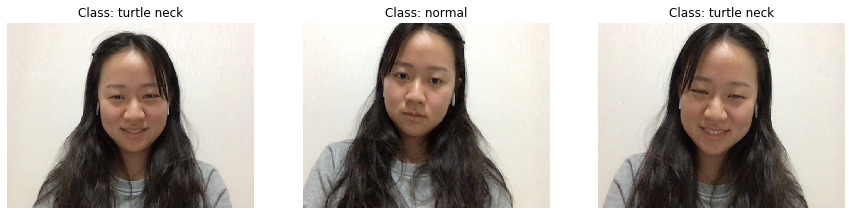

In [13]:
import random
plt.figure(figsize=(15, 5))
for i in range(3):
    idx = random.randint(0, 127)
    plt.subplot(1, 3, i + 1)
    plt.axis('off')
    plt.imshow(images[idx, :, :, :].reshape(480, 640, 3), cmap = "gray_r")
    plt.title('Class: ' + ['normal','turtle neck'][np.argmax(labels[idx])])

In [14]:
import tensorflow as tf

In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(480,640,3)),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dense(units=2, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='BinaryCrossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 921600)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               471859712 
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 1026      
Total params: 471,860,738
Trainable params: 471,860,738
Non-trainable params: 0
_________________________________________________________________


In [20]:
history = model.fit(images, labels, epochs=5, validation_split=0.25)

Epoch 1/5
3/3 [==============================] - 96s 32s/step - loss: 4.4155 - accuracy: 0.6042 - val_loss: 8.6271 - val_accuracy: 0.4375
Epoch 2/5
3/3 [==============================] - 112s 37s/step - loss: 7.3490 - accuracy: 0.5208 - val_loss: 8.6271 - val_accuracy: 0.4375
Epoch 3/5
3/3 [==============================] - 92s 31s/step - loss: 7.3490 - accuracy: 0.5208 - val_loss: 8.6271 - val_accuracy: 0.4375
Epoch 4/5
3/3 [==============================] - 91s 30s/step - loss: 7.3490 - accuracy: 0.5208 - val_loss: 8.6271 - val_accuracy: 0.4375
Epoch 5/5
3/3 [==============================] - 92s 31s/step - loss: 7.3490 - accuracy: 0.5208 - val_loss: 8.6271 - val_accuracy: 0.4375


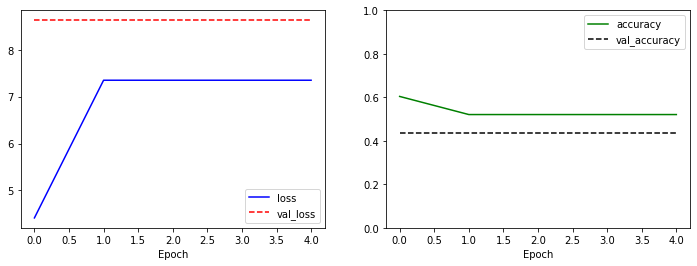

In [23]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.0, 1)
plt.legend()

plt.show()

In [8]:
# data loader for torch
transforms = torchvision.transforms.Compose([
    p.torch_transform(),
    torchvision.transforms.ToTensor(),
])